In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('spam.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Message'],df['spam'],test_size=0.30,random_state=0)


In [8]:

np.set_printoptions(threshold=np.inf)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x_train_count=v.fit_transform(x_train.values)
# x_train_count.toarray()[:3]

In [10]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [11]:
emails=[
    'Hey Mohan,can we get together to watch football game tommorrow?',
    'Your ATM card will be blocked. Update your KYC now: http://fake-link.com'
]

emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [22]:
x_test_count=v.transform(x_test)
y_pred=model.predict(x_test_count)

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm

array([[1446,    5],
       [  19,  202]], dtype=int64)

In [14]:
score=accuracy_score(y_test,y_pred)*100
score

98.56459330143541

In [15]:
df['spam'].unique()

array([0, 1], dtype=int64)

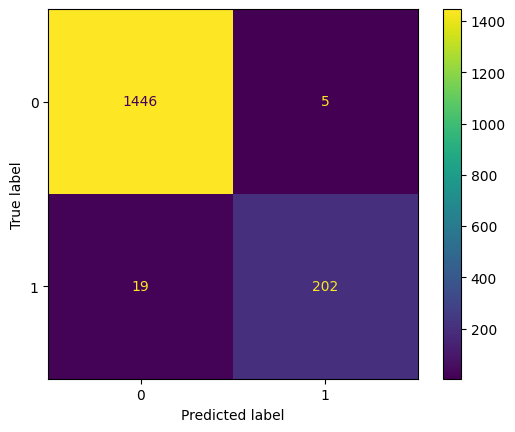

In [16]:
lab=[0,1]
cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lab)
cmd.plot()

In [17]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [18]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [19]:
clf.score(x_test,y_test)

0.9856459330143541

In [20]:
clf.predict(emails)

array([0, 1], dtype=int64)